In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import csv
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from collections import Counter
from scipy import interpolate
from scipy.optimize import leastsq
from scipy import stats
import copy
from io import StringIO
from MyFunctions import * # MyModule
from scipy.optimize import curve_fit


In [3]:
fase_freq_fundo_4_6GHz,nun,fase_fundo_4_6GHz = ImportS2P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span4-6GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)

In [4]:
fase_freq_fundo_4_10GHz,nun,fase_fundo_4_10GHz = ImportS2P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span4-10GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)

In [5]:
fase_freq_fundo_0_18GHz,nun,fase_fundo_0_18GHz = ImportS2P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/base_abaixo7mk_512avg_10mK_10001points_0db_linha3&4_span0-18GHz.csv"\
                                       ,Delimiter = ";", Cols = (0,1,2), Skip_head=0)

# Ressonador 1

In [6]:
S21_freq_res1, S21_res1 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/S21_chip1_2.075-2.125GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

In [7]:
fase_freq_res1,fase_res1 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/Fase/Fase_chip1_2.08-2.12GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

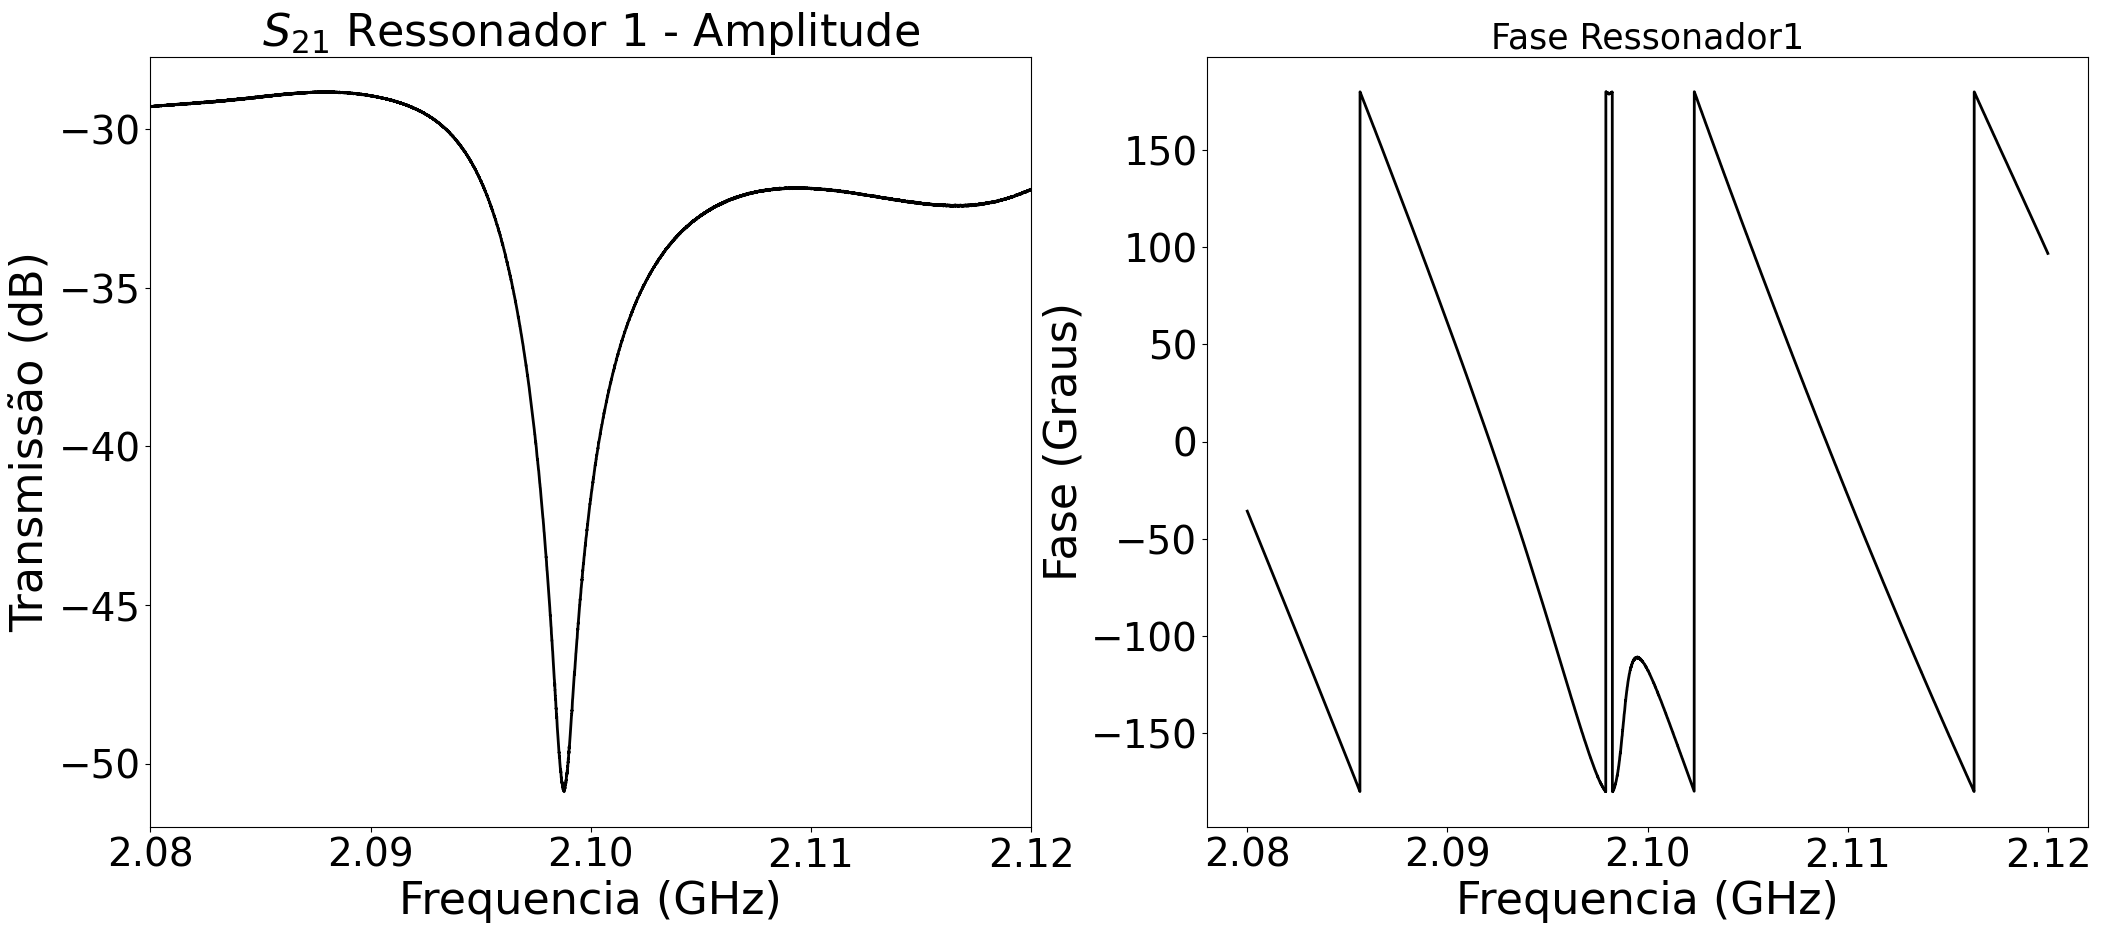

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res1, S21_res1, linewidth=2, color='black', label='Dados')
ax[0].set_title("$S_{21}$ Ressonador 1 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res1,fase_res1, linewidth=2, color='black', label='Dados')
ax[1].set_title("Fase Ressonador1", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (Graus)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
#ax[1].set_xlim(8.2,8.7)
#ax[1].set_ylim(-50,0)

In [266]:
print(np.min(S21_res1))
index=0
for j in arange(0,len(S21_freq_res1)):
    if S21_res1[j] == -50.88600801:
        index=j
print(S21_freq_res1[4758])

-50.88600801
2.09879


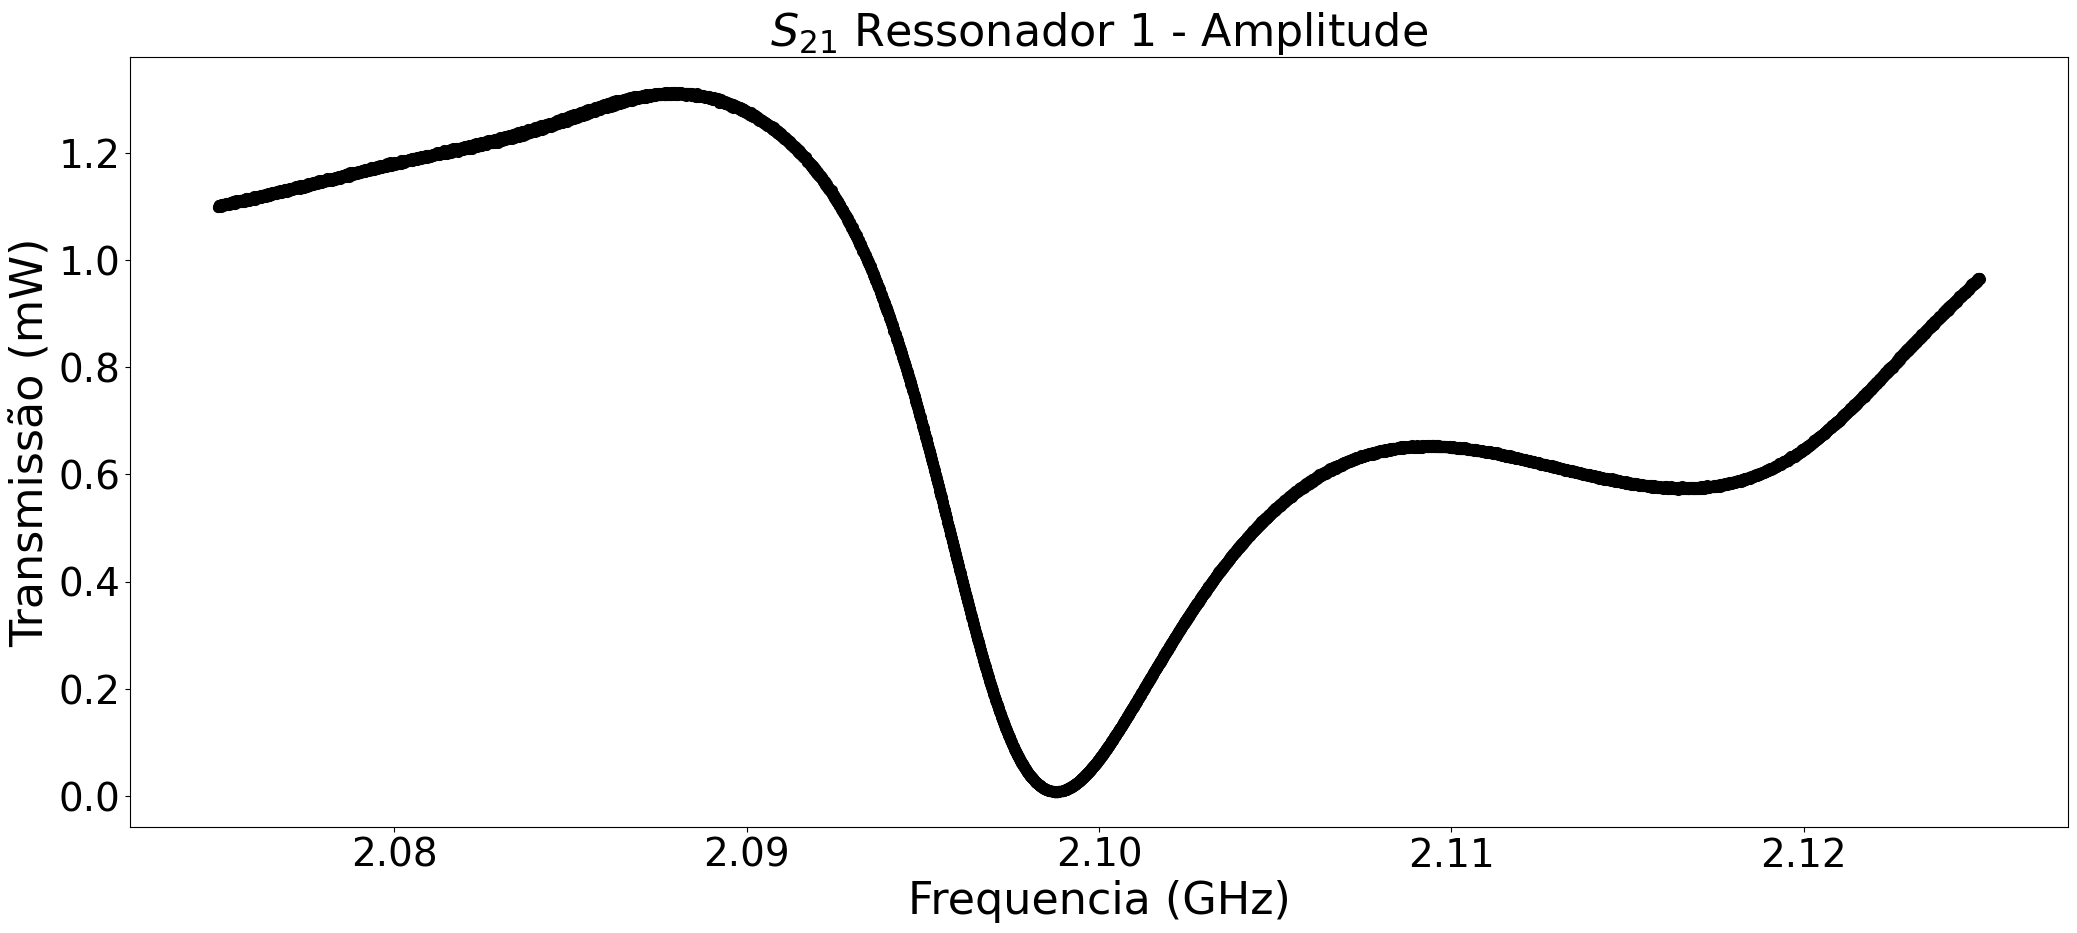

In [351]:
# convertendo de dB para W
S21_res1_W=(10**(S21_res1/10))*1000

fig, ax = plt.subplots(1, 1, figsize=(25,10))

ax.scatter(S21_freq_res1, S21_res1_W, linewidth=2, color='black', label='Dados')
ax.set_title("$S_{21}$ Ressonador 1 - Amplitude", fontsize=32)
ax.set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax.set_ylabel(r"Transmissão (mW)", fontsize=32)
ax.tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax.set_xlim(2.08,2.12)


## FIT LORENTZIANA

## $F_{Lor}(f)=A_0+[-A_1\frac{\delta f^2}{(f-f_0)^2+(\delta f)^2}]$

In [327]:
f0=S21_freq_res1[4758]

# Definição da função Lorentziana
def lorentzian(x, A0, A1, x0, gamma):
    return (-A1 * ((gamma**2)/((x-x0)**2+gamma**2))) + A0

x_data = S21_freq_res1[3500:7000]
y_data = S21_res1[3500:7000]

# Ajustando a curva Lorentziana aos dados
initial_guess = [1,1,2,0]  # Palpite inicial para os parâmetros [A0, A1, x0, deltaf]
params, covariance = curve_fit(lorentzian, x_data, y_data, p0=initial_guess)

# Extraindo os parâmetros ajustados
A0_fit, A1_fit, x0_fit, deltaf_fit = params

# Gerando a curva ajustada
F_lor = lorentzian(x_data, A0_fit, A1_fit, x0_fit, deltaf_fit)

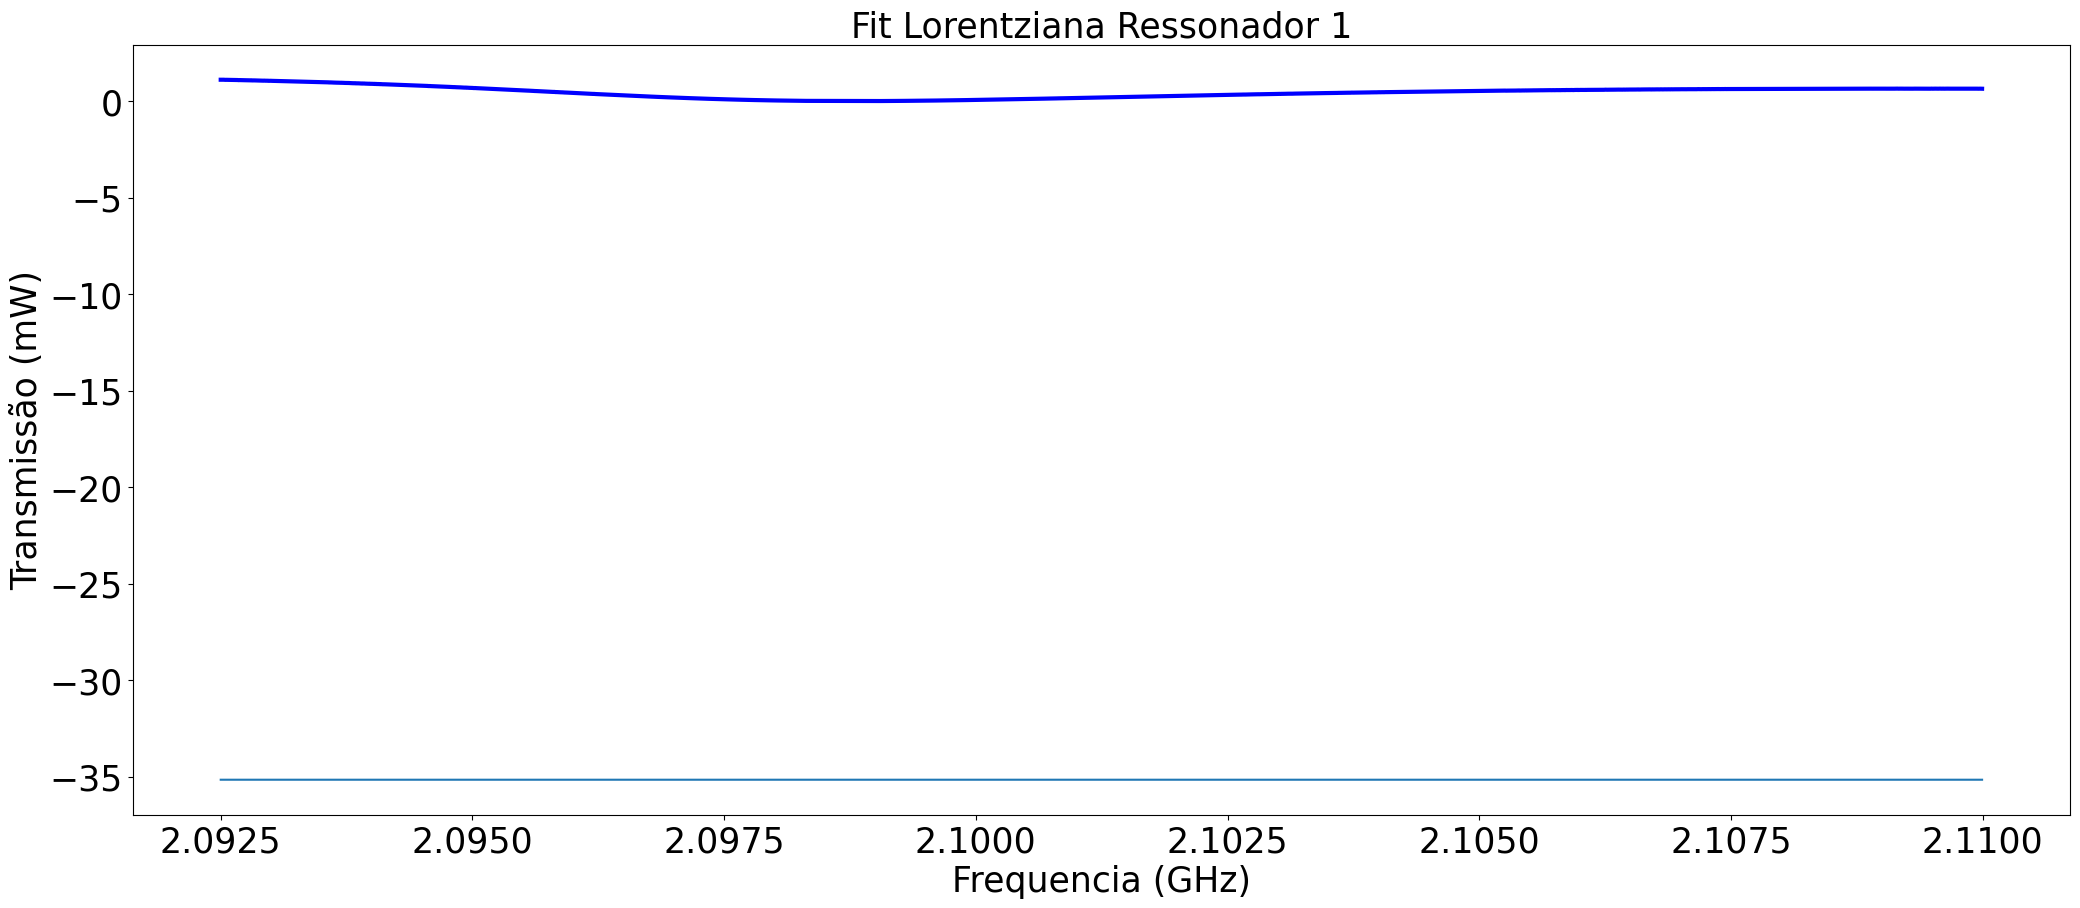

In [329]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))

ax.plot(S21_freq_res1[3500:7000], S21_res1_W[3500:7000], linewidth=3, color='blue')
ax.plot(S21_freq_res1[3500:7000], F_lor)
#ax.hlines(y=np.max(S21_chip1_res3_abs_lor)-3, xmin=6.3, xmax=6.4)
#ax.vlines(x=6.37510,ymin=0, ymax=23)
#ax.vlines(x=6.3717,ymin=0, ymax=23, color='red')
ax.set_title("Fit Lorentziana Ressonador 1", fontsize=25)
ax.set_xlabel(r"Frequencia (GHz)", fontsize=25)
ax.set_ylabel(r"Transmissão (mW)", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
#ax.set_xlim(2.05,2.15)
#ax.set_ylim(-36,-34)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definindo a função Lorentziana com termo de amplitude
def lorentziana(x, amplitude, x0, gamma, offset):
    return (-amplitude * (gamma**2 / ((x - x0)**2 + gamma**2))) + offset

# Função de erro (mínimos quadrados)
def erro_lorentziana(params, x_data, y_data):
    amplitude, x0, gamma, offset = params
    y_fit = lorentziana(x_data, amplitude, x0, gamma, offset)
    erro = np.sum((y_data - y_fit) ** 2)
    return erro

# Gerando dados de exemplo com ruído
def gerar_dados(amplitude, x0, gamma, offset, num_points=100, noise_level=0.05):
    x_data = np.linspace(-10, 10, num_points)
    y_data = lorentziana(x_data, amplitude, x0, gamma, offset)
    noise = noise_level * np.random.normal(size=x_data.size)
    y_data_noisy = y_data + noise
    return x_data, y_data_noisy

# Ajustando a Lorentziana aos dados usando método dos mínimos quadrados
def ajustar_lorentziana(x_data, y_data):
    initial_guess = [18, 2, 0, -1]
    result = minimize(erro_lorentziana, initial_guess, args=(x_data, y_data), method='L-BFGS-B')
    return result.x

# Análise dos resíduos
def analisar_residuos(x_data, y_data, params):
    y_fit = lorentziana(x_data, *params)
    residuos = y_data - y_fit
    return residuos

# Plotando os dados e o ajuste com resíduos
def plotar_resultados(x_data, y_data, params):
    y_fit = lorentziana(x_data, *params)
    residuos = analisar_residuos(x_data, y_data, params)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot dos dados e ajuste
    ax.scatter(x_data, y_data, label='Dados', color='blue', linewidth=0.1, marker='v')
    ax.plot(x_data, y_fit, label='Ajuste Lorentziana', color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#    ax.set_xlim(2.09,2.11)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Gerando dados de exemplo
#amplitude_real = 1.0
#x0_real = 1
#gamma_real = 1.0
#offset_real = 0.1
x_data, y_data = S21_freq_res1, S21_res1

# Ajustando a Lorentziana aos dados
params_ajustados = ajustar_lorentziana(x_data, y_data)
print(f"Parâmetros ajustados: Amplitude={params_ajustados[0]}, x0={params_ajustados[1]}, Gamma={params_ajustados[2]}, Offset={params_ajustados[3]}")

# Plotando os resultados
plotar_resultados(x_data, y_data_noisy, params_ajustados)

Parâmetros ajustados: Amplitude=18.795350157863393, x0=2.0989447459648765, Gamma=-0.001491413907873009, Offset=-30.348861225896385


NameError: name 'y_data_noisy' is not defined

Parâmetros ajustados: Amplitude=18.867478232418264, x0=2.0989386150750957, Gamma=-0.0014888838254576136, Offset=-1.8431372159331754, Linear Term=-13.573673803277307


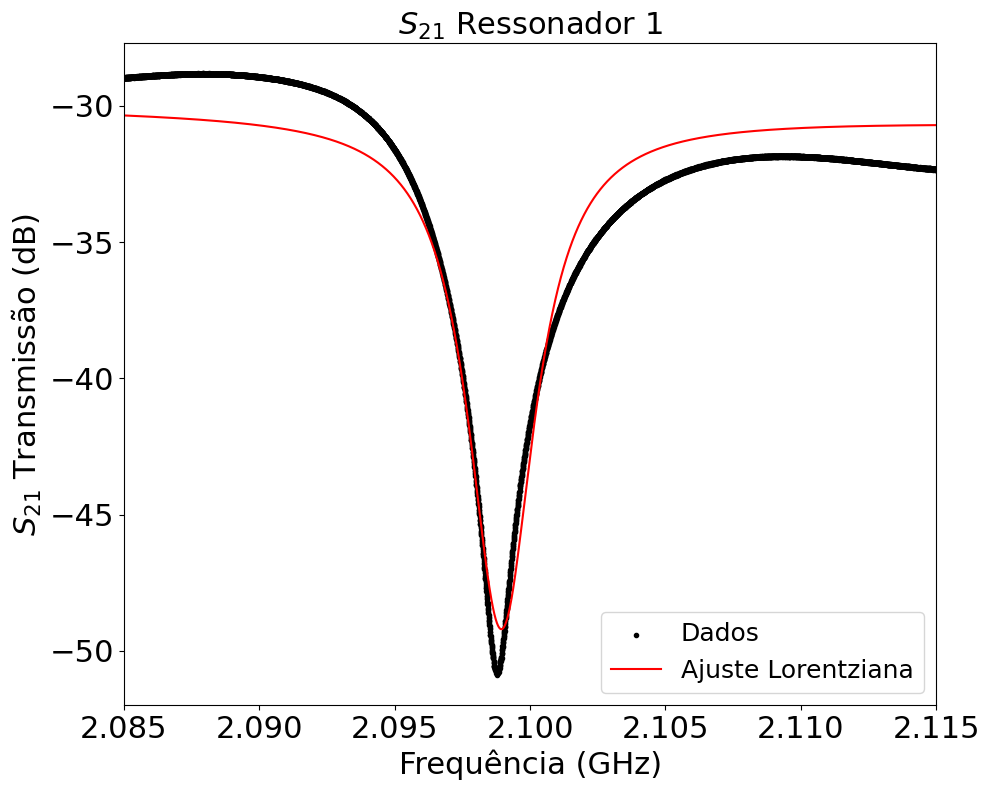

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definindo a função Lorentziana negativa com termos de offset e linear
def lorentziana_negativa(x, amplitude, x0, gamma, offset, linear_term):
    return (-amplitude * (gamma**2 / ((x - x0)**2 + gamma**2))) + offset + linear_term * x

# Função de erro (mínimos quadrados)
def erro_lorentziana(params, x_data, y_data):
    amplitude, x0, gamma, offset, linear_term = params
    y_fit = lorentziana_negativa(x_data, amplitude, x0, gamma, offset, linear_term)
    erro = np.sum((y_data - y_fit) ** 2)
    return erro

# Ajustando a Lorentziana aos dados usando método dos mínimos quadrados
def ajustar_lorentziana(x_data, y_data):
    initial_guess = [18, 2, 0, -1,-1]
    result = minimize(erro_lorentziana, initial_guess, args=(x_data, y_data), method='L-BFGS-B')
    return result.x

# Análise dos resíduos
def analisar_residuos(x_data, y_data, params):
    y_fit = lorentziana_negativa(x_data, *params)
    residuos = y_data - y_fit
    return residuos

# Plotando os dados e o ajuste com resíduos
def plotar_resultados(x_data, y_data, params):
    y_fit = lorentziana_negativa(x_data, *params)
    residuos = analisar_residuos(x_data, y_data, params)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot dos dados e ajuste
    ax.scatter(x_data, y_data, label='Dados', color='black', marker='.', linewidth=1)
    ax.plot(x_data, y_fit, label='Ajuste Lorentziana', color='red')
    ax.set_title('$S_{21}$ Ressonador 1', fontsize=22)
    ax.set_ylabel('$S_{21}$ Transmissão (dB)', fontsize=22)
    ax.set_xlabel('Frequência (GHz)', fontsize=22)
    ax.set_xlim(2.085,2.115)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.legend(loc='lower right', prop={'size': 18})
    
    plt.tight_layout()
    plt.show()

# Gerando dados de exemplo
#amplitude_real = 1.0
#x0_real = 0.0
#gamma_real = 1.0
#offset_real = 0.1
#linear_term_real = 0.1
#x_data, y_data_noisy = gerar_dados(amplitude_real, x0_real, gamma_real, offset_real, linear_term_real)
x_data, y_data= S21_freq_res1, S21_res1

# Ajustando a Lorentziana aos dados
params_ajustados = ajustar_lorentziana(x_data, y_data)
print(f"Parâmetros ajustados: Amplitude={params_ajustados[0]}, x0={params_ajustados[1]}, Gamma={params_ajustados[2]}, Offset={params_ajustados[3]}, Linear Term={params_ajustados[4]}")

# Plotando os resultados
plotar_resultados(x_data, y_data, params_ajustados)

# Ressonador 2

In [30]:
S21_freq_res2,S21_res2 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/S21_chip1_3.21-3.24GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

In [31]:
fase_freq_res2,fase_res2 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/Fase/Fase_chip1_3.2-3.25GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

(3.21, 3.24)

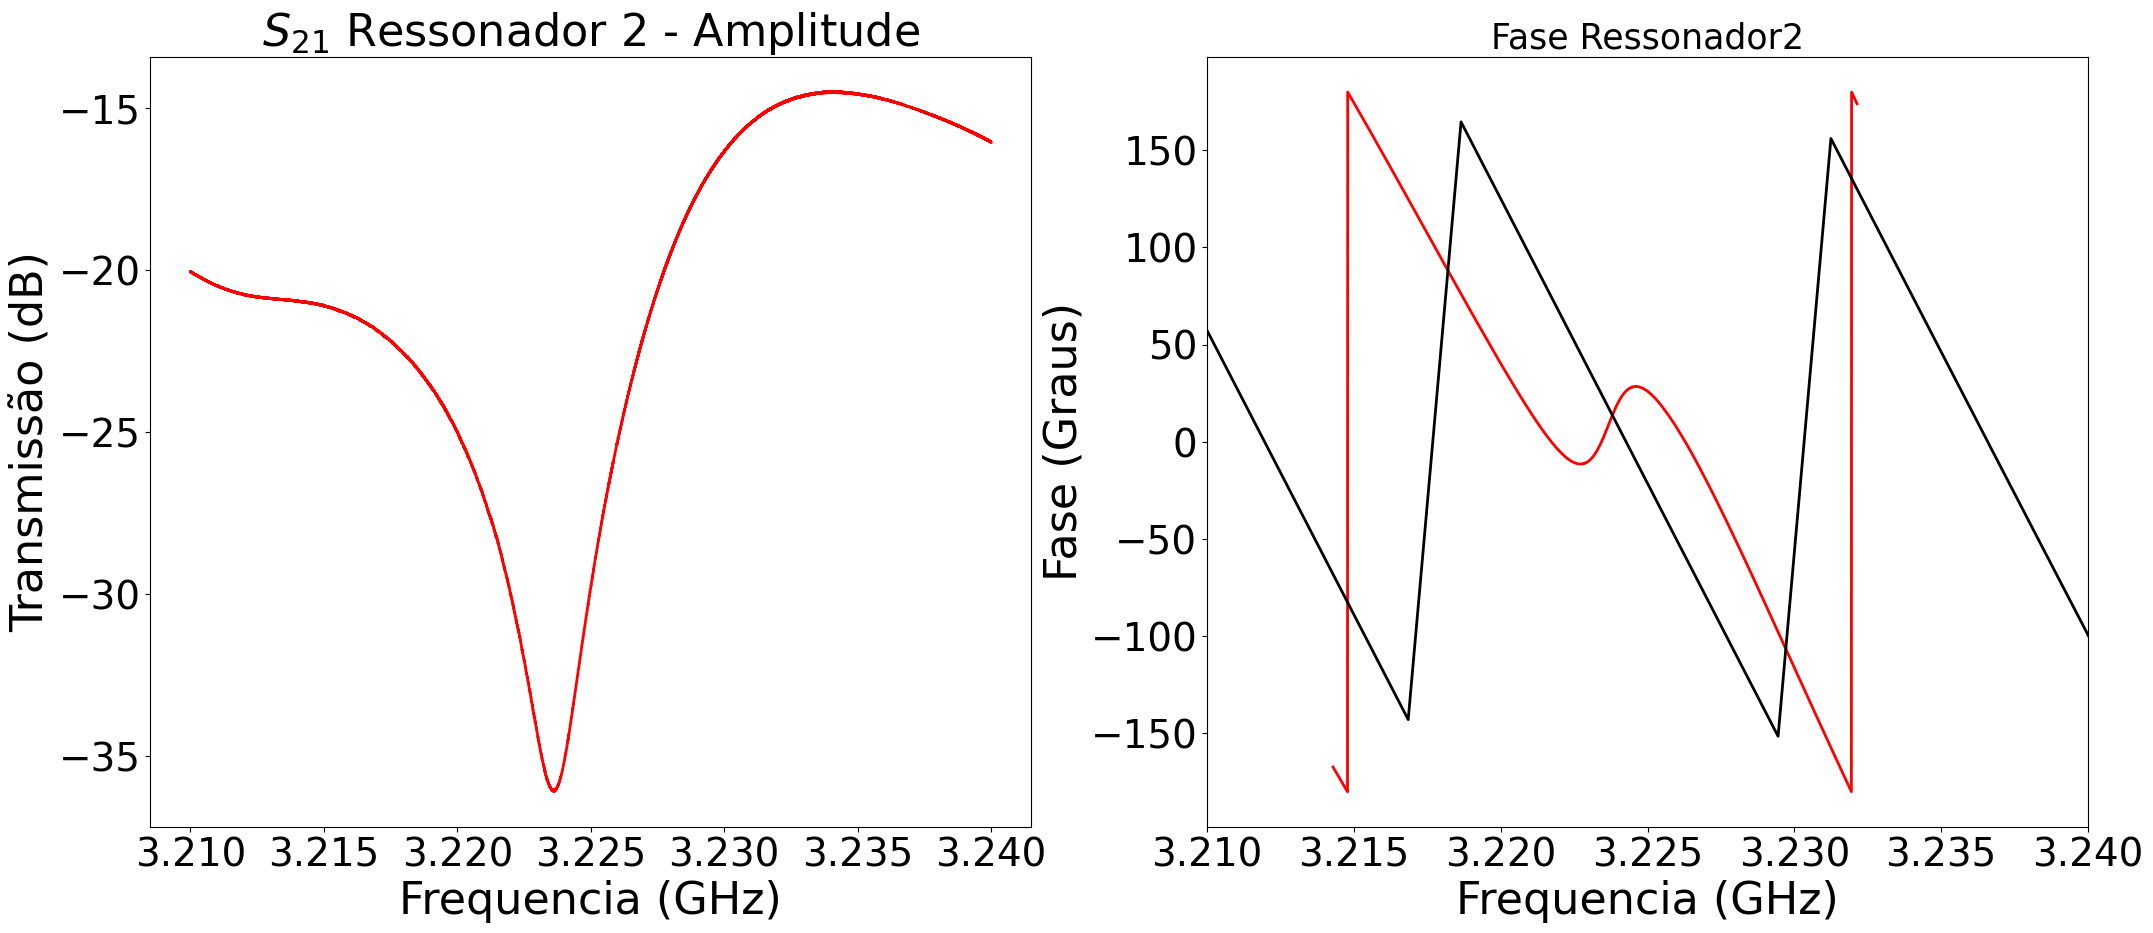

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res2, S21_res2, linewidth=2, color='red', label='Dados')
ax[0].set_title("$S_{21}$ Ressonador 2 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res2[2000:4500],fase_res2[2000:4500], linewidth=2, color='red', label='Dados')
ax[1].plot(fase_freq_fundo_0_18GHz/(10**9),fase_fundo_0_18GHz, linewidth=2, color='black', label='Fundo')
ax[1].set_title("Fase Ressonador2", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (Graus)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
ax[1].set_xlim(3.21,3.24)
#ax[1].set_ylim(-50,0)

In [43]:
print(np.min(S21_res2))
index=0
for j in arange(0,len(S21_freq_res2)):
    if S21_res2[j] == -36.10135645:
        index=j
print(S21_freq_res2[4548])

-36.10135645
3.223644


Parâmetros ajustados: Amplitude=20.00699142058891, x0=3.2230392969187145, Gamma=0.0029581644192219494, Offset=3.426538751552697, Linear Term=-5.875411463187788


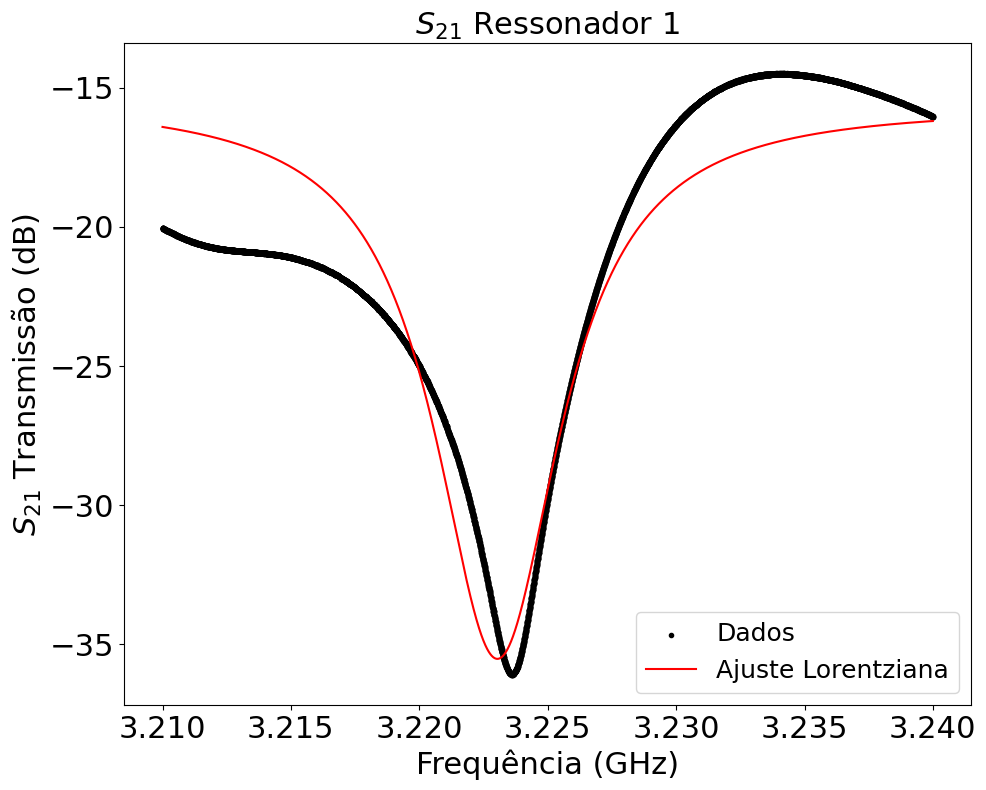

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definindo a função Lorentziana negativa com termos de offset e linear
def lorentziana_negativa(x, amplitude, x0, gamma, offset, linear_term):
    return (-amplitude * (gamma**2 / ((x - x0)**2 + gamma**2))) + offset + linear_term * x

# Função de erro (mínimos quadrados)
def erro_lorentziana(params, x_data, y_data):
    amplitude, x0, gamma, offset, linear_term = params
    y_fit = lorentziana_negativa(x_data, amplitude, x0, gamma, offset, linear_term)
    erro = np.sum((y_data - y_fit) ** 2)
    return erro

# Ajustando a Lorentziana aos dados usando método dos mínimos quadrados
def ajustar_lorentziana(x_data, y_data):
    initial_guess = [20, 3, 0.15, 2,-10.56]
    result = minimize(erro_lorentziana, initial_guess, args=(x_data, y_data), method='L-BFGS-B')
    return result.x

# Análise dos resíduos
def analisar_residuos(x_data, y_data, params):
    y_fit = lorentziana_negativa(x_data, *params)
    residuos = y_data - y_fit
    return residuos

# Plotando os dados e o ajuste com resíduos
def plotar_resultados(x_data, y_data, params):
    y_fit = lorentziana_negativa(x_data, *params)
    residuos = analisar_residuos(x_data, y_data, params)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot dos dados e ajuste
    ax.scatter(x_data, y_data, label='Dados', color='black', marker='.', linewidth=1)
    ax.plot(x_data, y_fit, label='Ajuste Lorentziana', color='red')
    ax.set_title('$S_{21}$ Ressonador 1', fontsize=22)
    ax.set_ylabel('$S_{21}$ Transmissão (dB)', fontsize=22)
    ax.set_xlabel('Frequência (GHz)', fontsize=22)
#    ax.set_xlim(2.085,2.115)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.legend(loc='lower right', prop={'size': 18})
    
    plt.tight_layout()
    plt.show()

# Gerando dados de exemplo
#amplitude_real = 1.0
#x0_real = 0.0
#gamma_real = 1.0
#offset_real = 0.1
#linear_term_real = 0.1
#x_data, y_data_noisy = gerar_dados(amplitude_real, x0_real, gamma_real, offset_real, linear_term_real)
x_data, y_data= S21_freq_res2, S21_res2

# Ajustando a Lorentziana aos dados
params_ajustados = ajustar_lorentziana(x_data, y_data)
print(f"Parâmetros ajustados: Amplitude={params_ajustados[0]}, x0={params_ajustados[1]}, Gamma={params_ajustados[2]}, Offset={params_ajustados[3]}, Linear Term={params_ajustados[4]}")

# Plotando os resultados
plotar_resultados(x_data, y_data, params_ajustados)

In [252]:
#convertendo para V
c=10*log10(20)
S21_res2_l=pow(10,(S21_res2-c)/20)#/1000
fundo_S21=pow(10,(-20-c)/20)#/1000

#Unwrap Phase

fase_res2_l = unwrap(radians(fase_res2[1000:4500]))

fase_fundo_0_18GHz_l = unwrap(radians(fase_fundo_0_18GHz))

S21_fundo=S21_res2_l * (exp(1j*(fase_fundo_0_18GHz_l[1:]*1000)))
x_fundo=fase_fundo_0_18GHz_l.real
y_fundo=fase_fundo_0_18GHz_l.imag

(-0.01, 0.01)

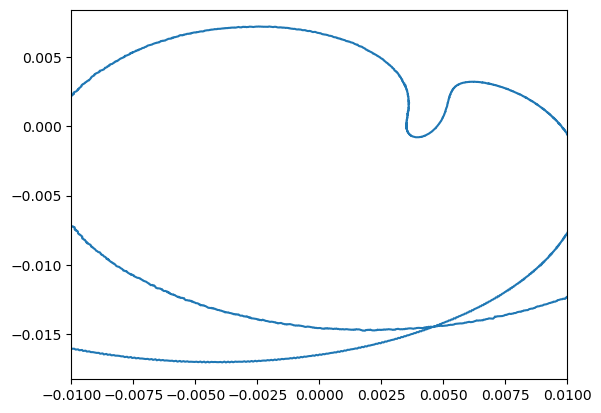

In [257]:
S21=S21_res2_l[2500:6000] * (exp(1j*(fase_res2_l)))
x=S21.real
y=S21.imag
plt.plot(x,y)
plt.plot(x_fundo,y_fundo)
plt.xlim(-0.01,0.01)

(-50.0, 50.0)

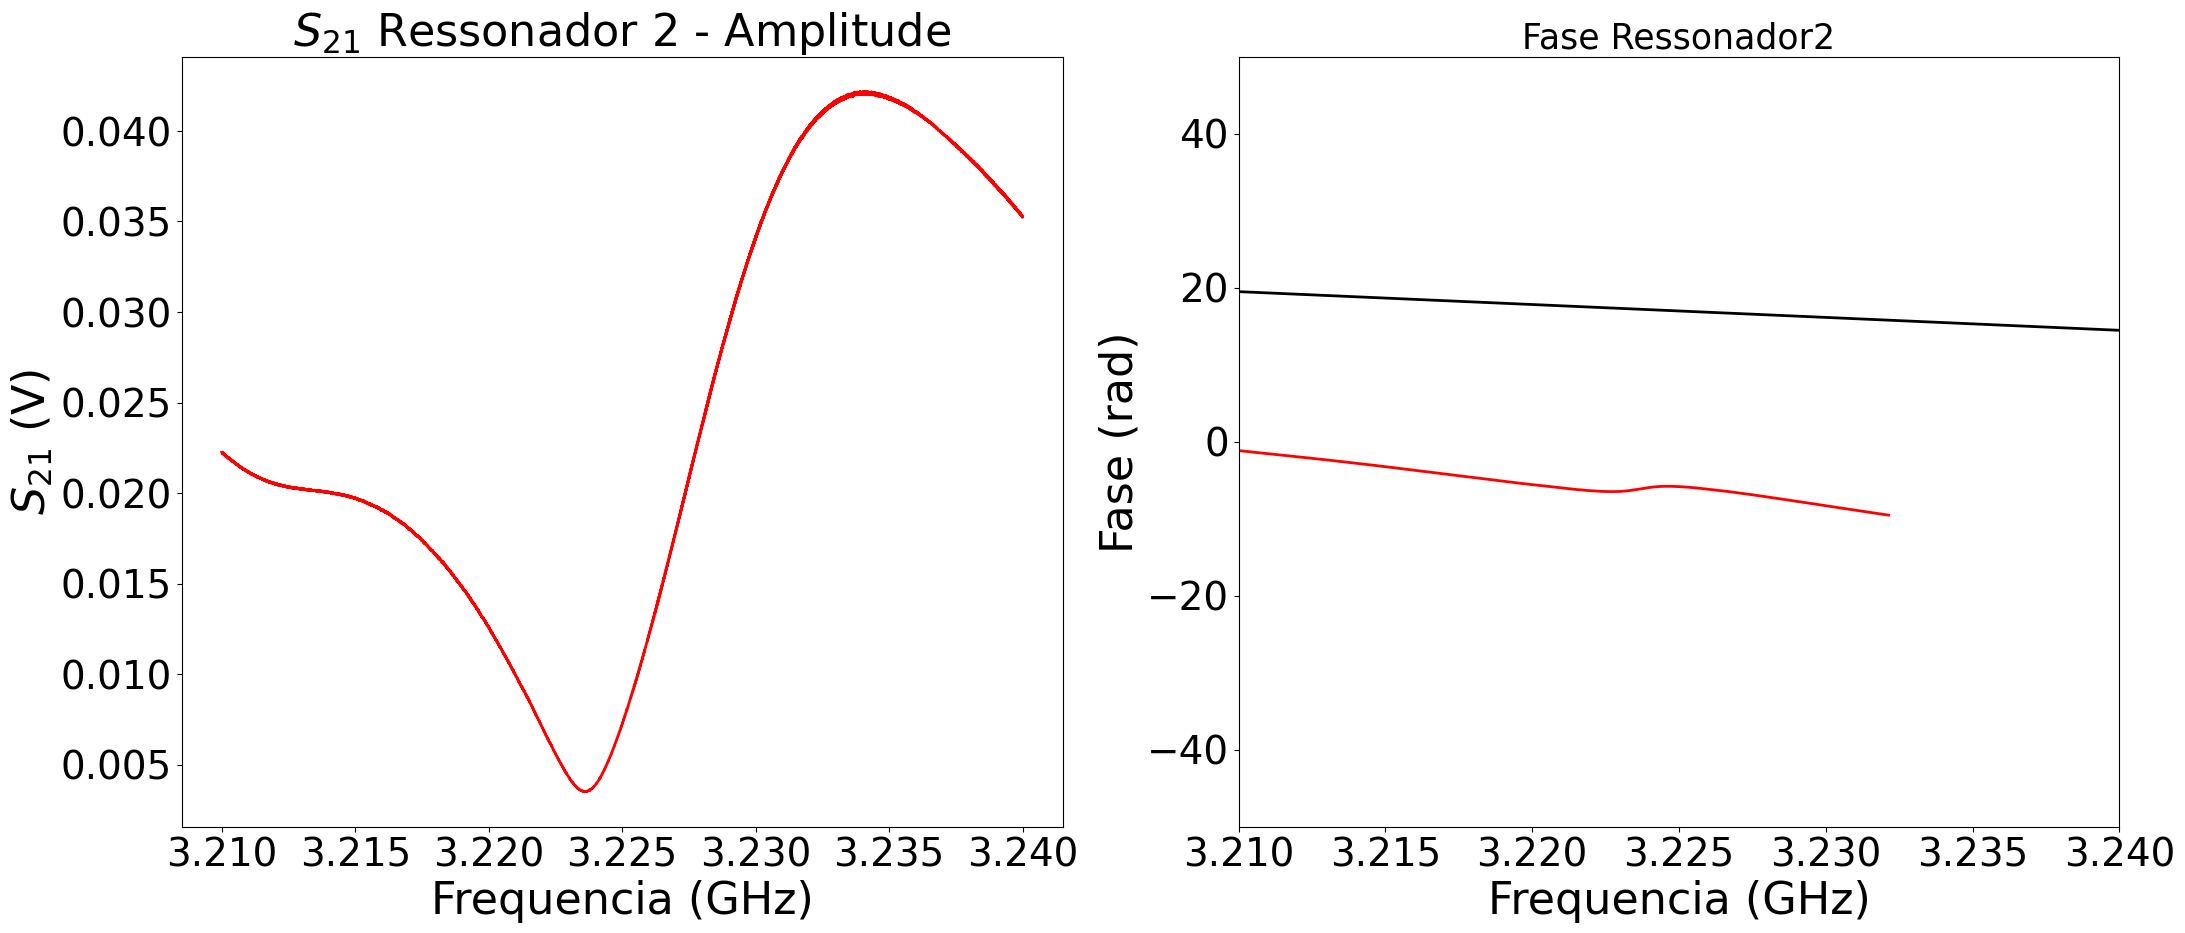

In [238]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res2, S21_res2_l, linewidth=2, color='red', label='Dados')
#ax[0].hlines(fundo_S21,S21_freq_res3[0],S21_freq_res3[-1], color='black')
ax[0].set_title("$S_{21}$ Ressonador 2 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"$S_{21}$ (V)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res2[1000:4500],fase_res2_l, linewidth=2, color='red', label='Dados')
ax[1].plot(fase_freq_fundo_0_18GHz/(10**9),fase_fundo_4_10GHz_l+560, linewidth=2, color='black', label='Dados')
ax[1].set_title("Fase Ressonador2", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (rad)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
ax[1].set_xlim(3.21,3.24)
ax[1].set_ylim(-50,50)

In [239]:
#INTERPOLAÇÃO DOS DADOS
fase_fundo_0_18GHz_l_fit=interp1d(fase_freq_fundo_0_18GHz/(10**9),fase_fundo_0_18GHz_l, kind='cubic')

In [240]:
# CORREÇÃO DOS DADOS
fase_res2_l_fit=wrap1(fase_fundo_0_18GHz_l_fit(fase_freq_res2[1000:4500])-fase_res2_l)

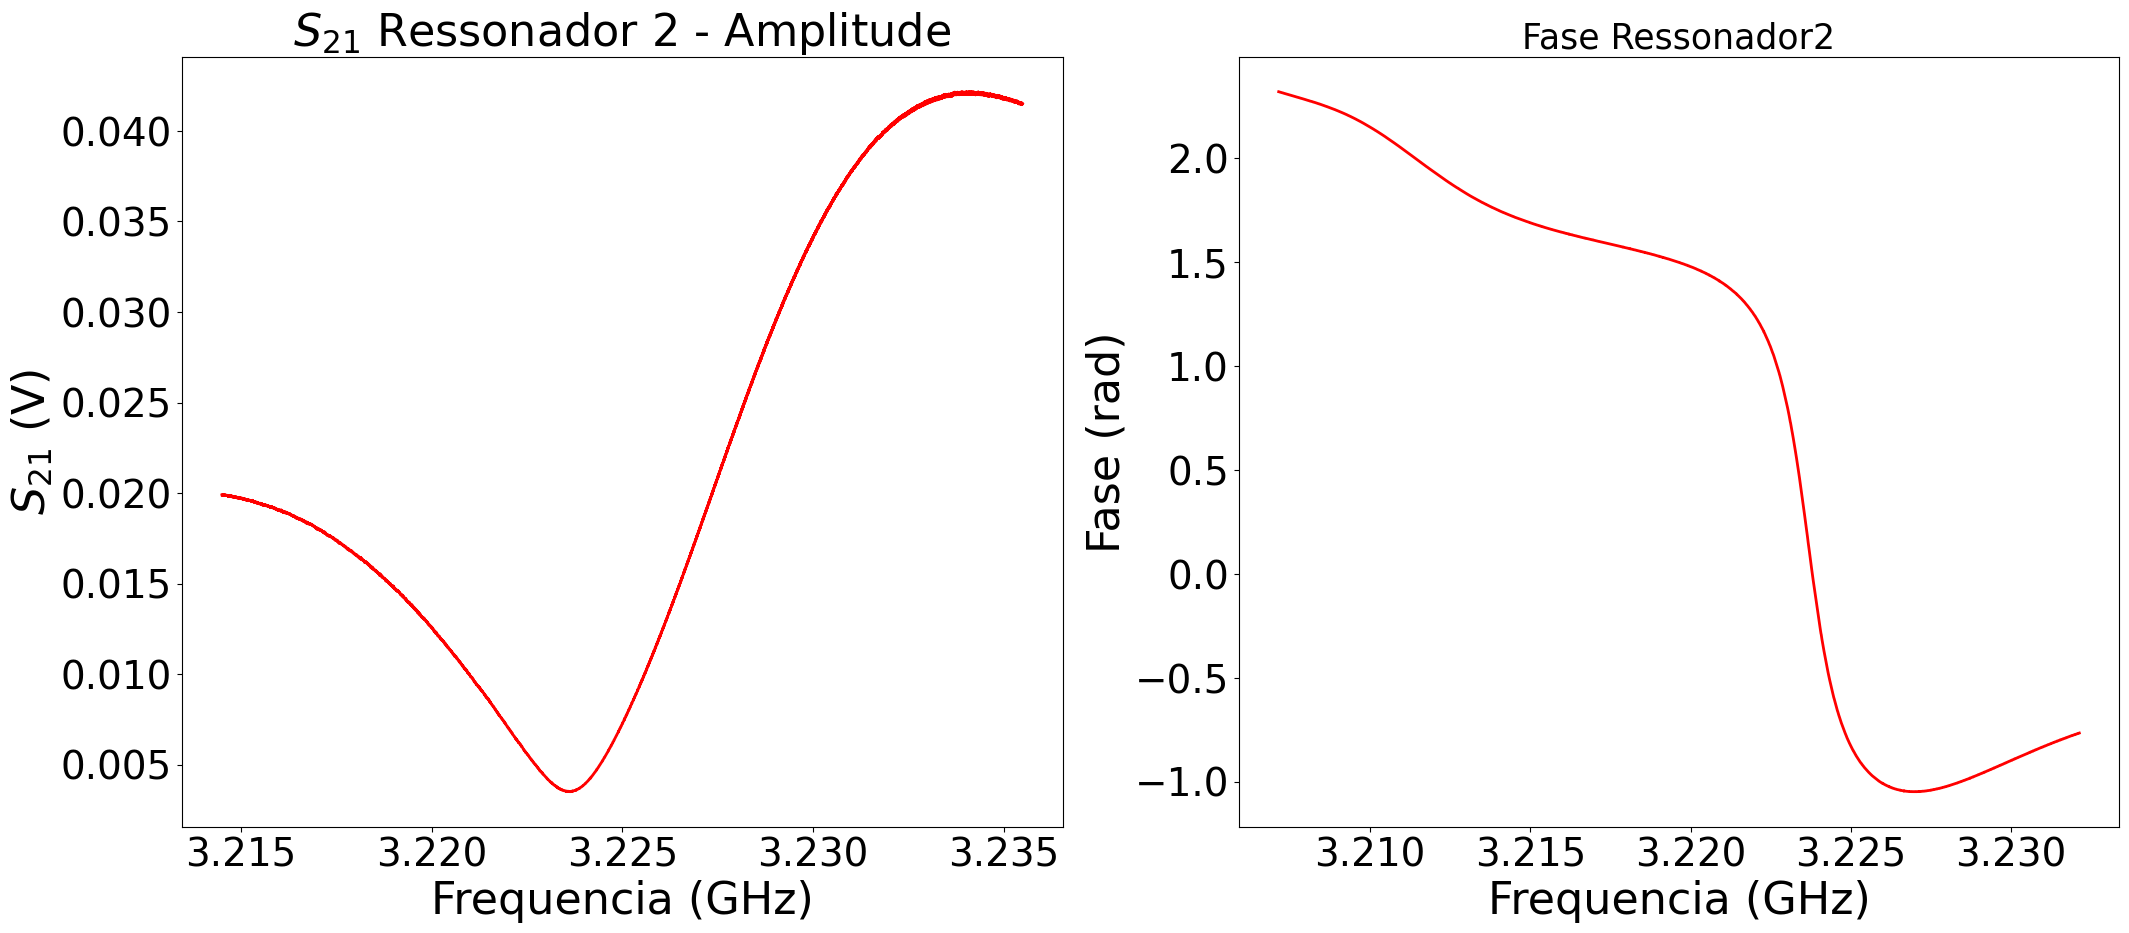

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res2[1500:8500], S21_res2_l[1500:8500], linewidth=2, color='red', label='Dados')
#ax[0].hlines(fundo_S21,S21_freq_res3[0],S21_freq_res3[-1], color='black')
ax[0].set_title("$S_{21}$ Ressonador 2 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"$S_{21}$ (V)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res2[1000:4500],fase_res2_l_fit, linewidth=2, color='red', label='Dados')
ax[1].set_title("Fase Ressonador2", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (rad)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
#ax[1].set_xlim(6.220,6.265)
#ax[1].set_ylim(-20,20)

In [243]:
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = fase_freq_res2[1000:4500]
Y0 = ((np.abs(S21_res2_l[1000:4500]))*(exp(1j*fase_res2_l_fit)))

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

array([-0.00456097,  0.00427452,  0.0140216 ])

-0.0045609688383777495 0.004274523693111236 0.014021598281506056
2.3886029667865647


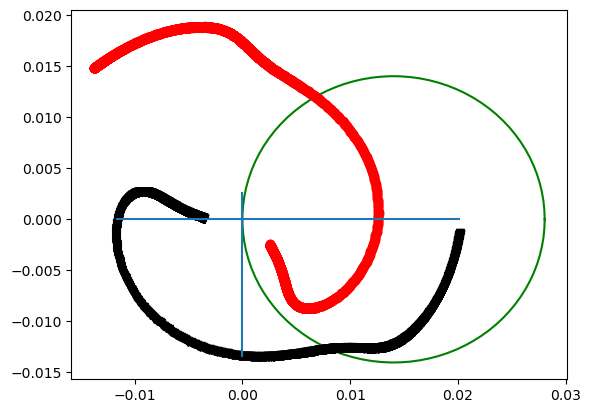

In [244]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,100)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
# Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
# plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

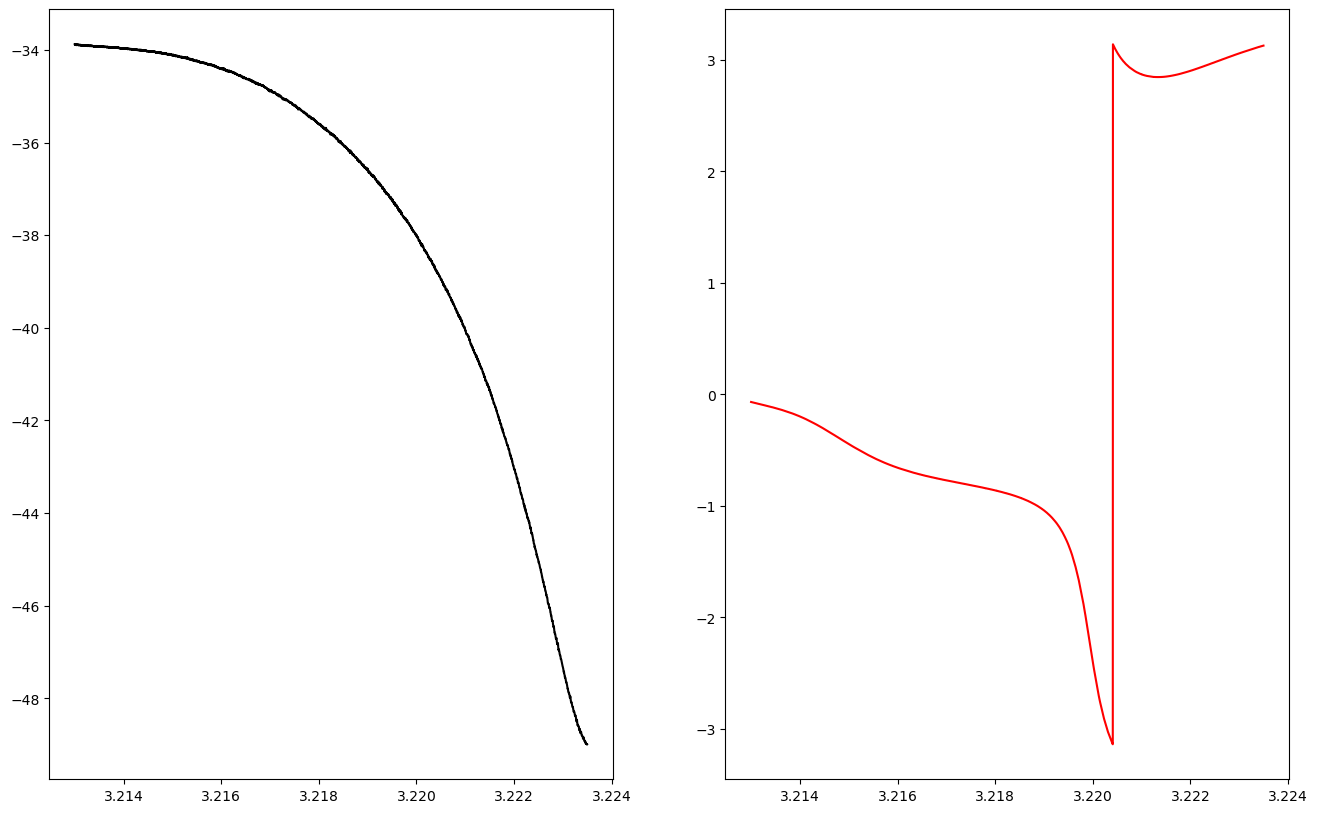

In [246]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(16,10))

ax[0].plot(S21_freq_res2[1000:4500],20*log10(abs(Y1)),'k-')
ax[1].plot(S21_freq_res2[1000:4500],angle(Y1),'r-')




## FIT LORENTZIANA

# Ressonador 3

In [36]:
S21_freq_res3,S21_res3 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/S21_chip1_6.235-6.255GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

In [37]:
fase_freq_res3,fase_res3 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/Fase/Fase_chip1_6.215-6.275GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

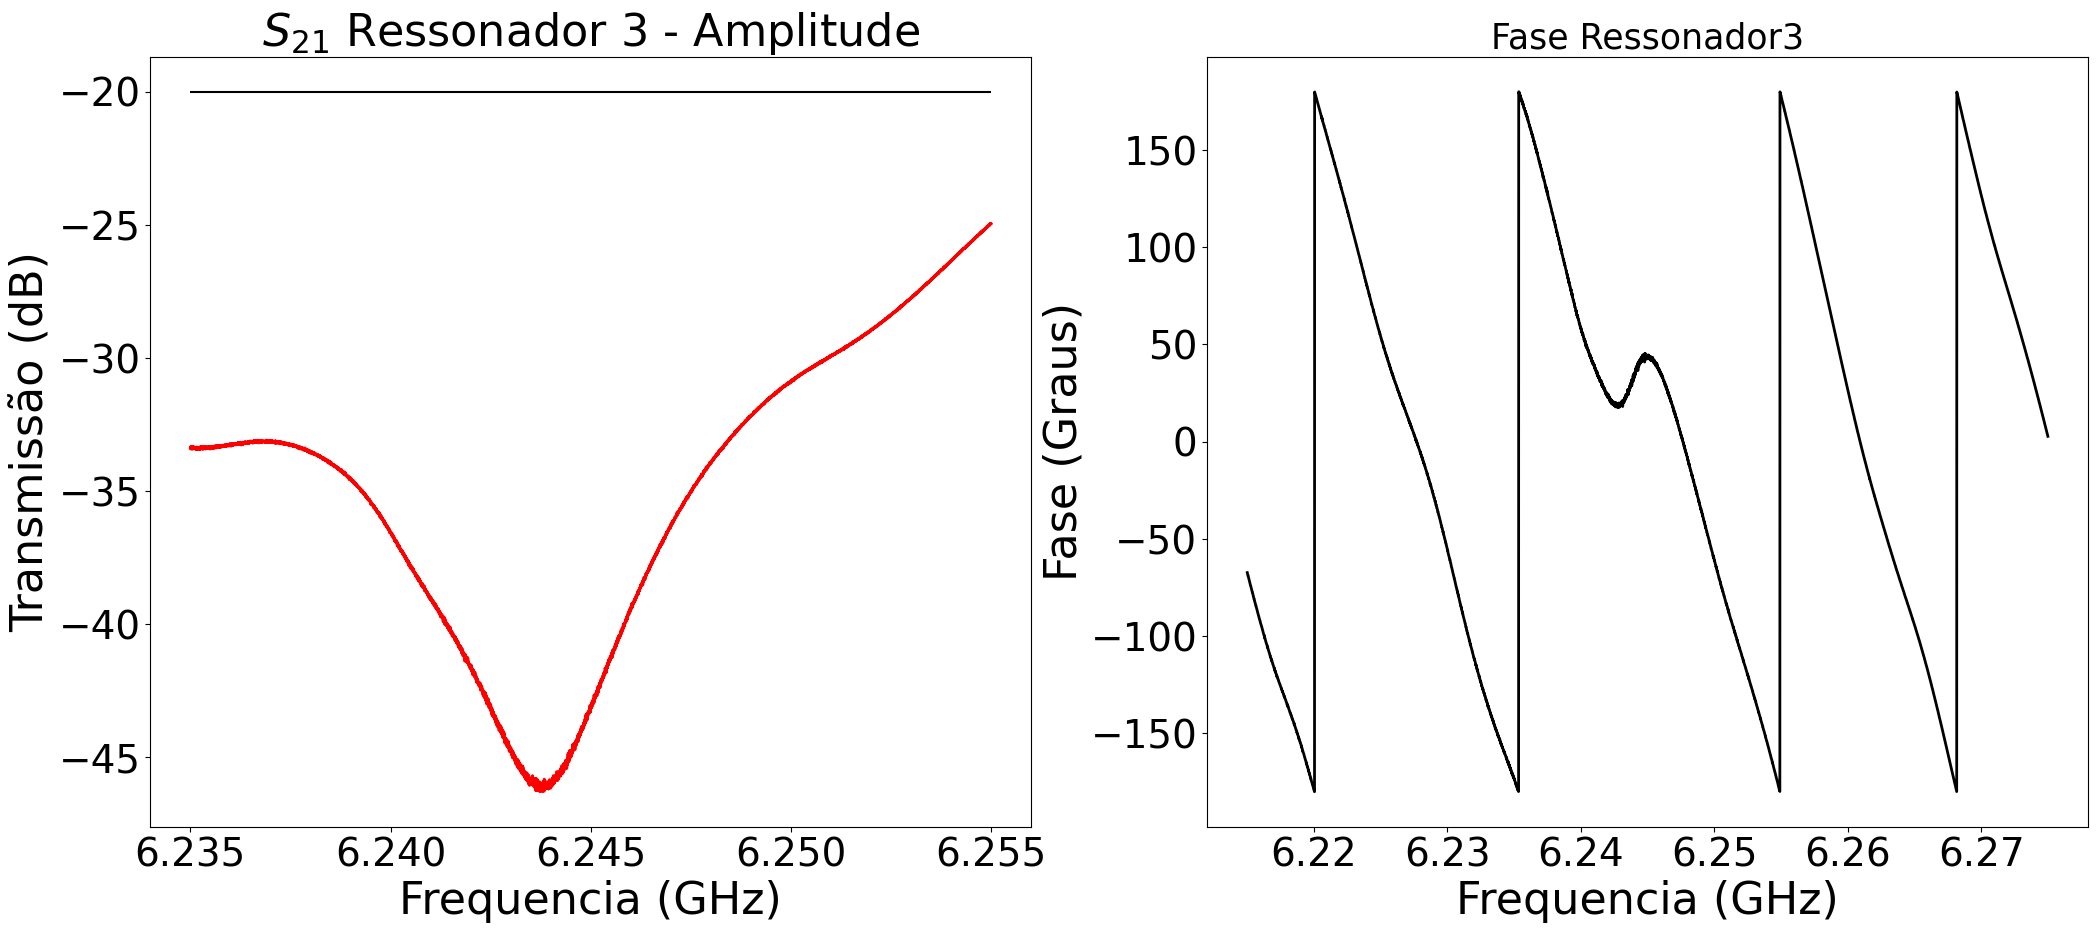

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res3, S21_res3, linewidth=2, color='red', label='Dados')
ax[0].hlines(-20,S21_freq_res3[0],S21_freq_res3[-1], color='black')
ax[0].set_title("$S_{21}$ Ressonador 3 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res3,fase_res3, linewidth=2, color='black', label='Dados')
ax[1].set_title("Fase Ressonador3", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (Graus)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
#ax[1].set_xlim(8.2,8.7)
#ax[1].set_ylim(-50,0)

In [41]:
#convertendo para V
c=10*log10(20)
S21_res3_l=pow(10,(S21_res3-c)/20)#/1000
fundo_S21=pow(10,(-20-c)/20)#/1000

#Unwrap Phase

fase_res3_l = unwrap(radians(fase_res3))

fase_fundo_4_10GHz_l = unwrap(radians(fase_fundo_4_10GHz))

(-50.0, 50.0)

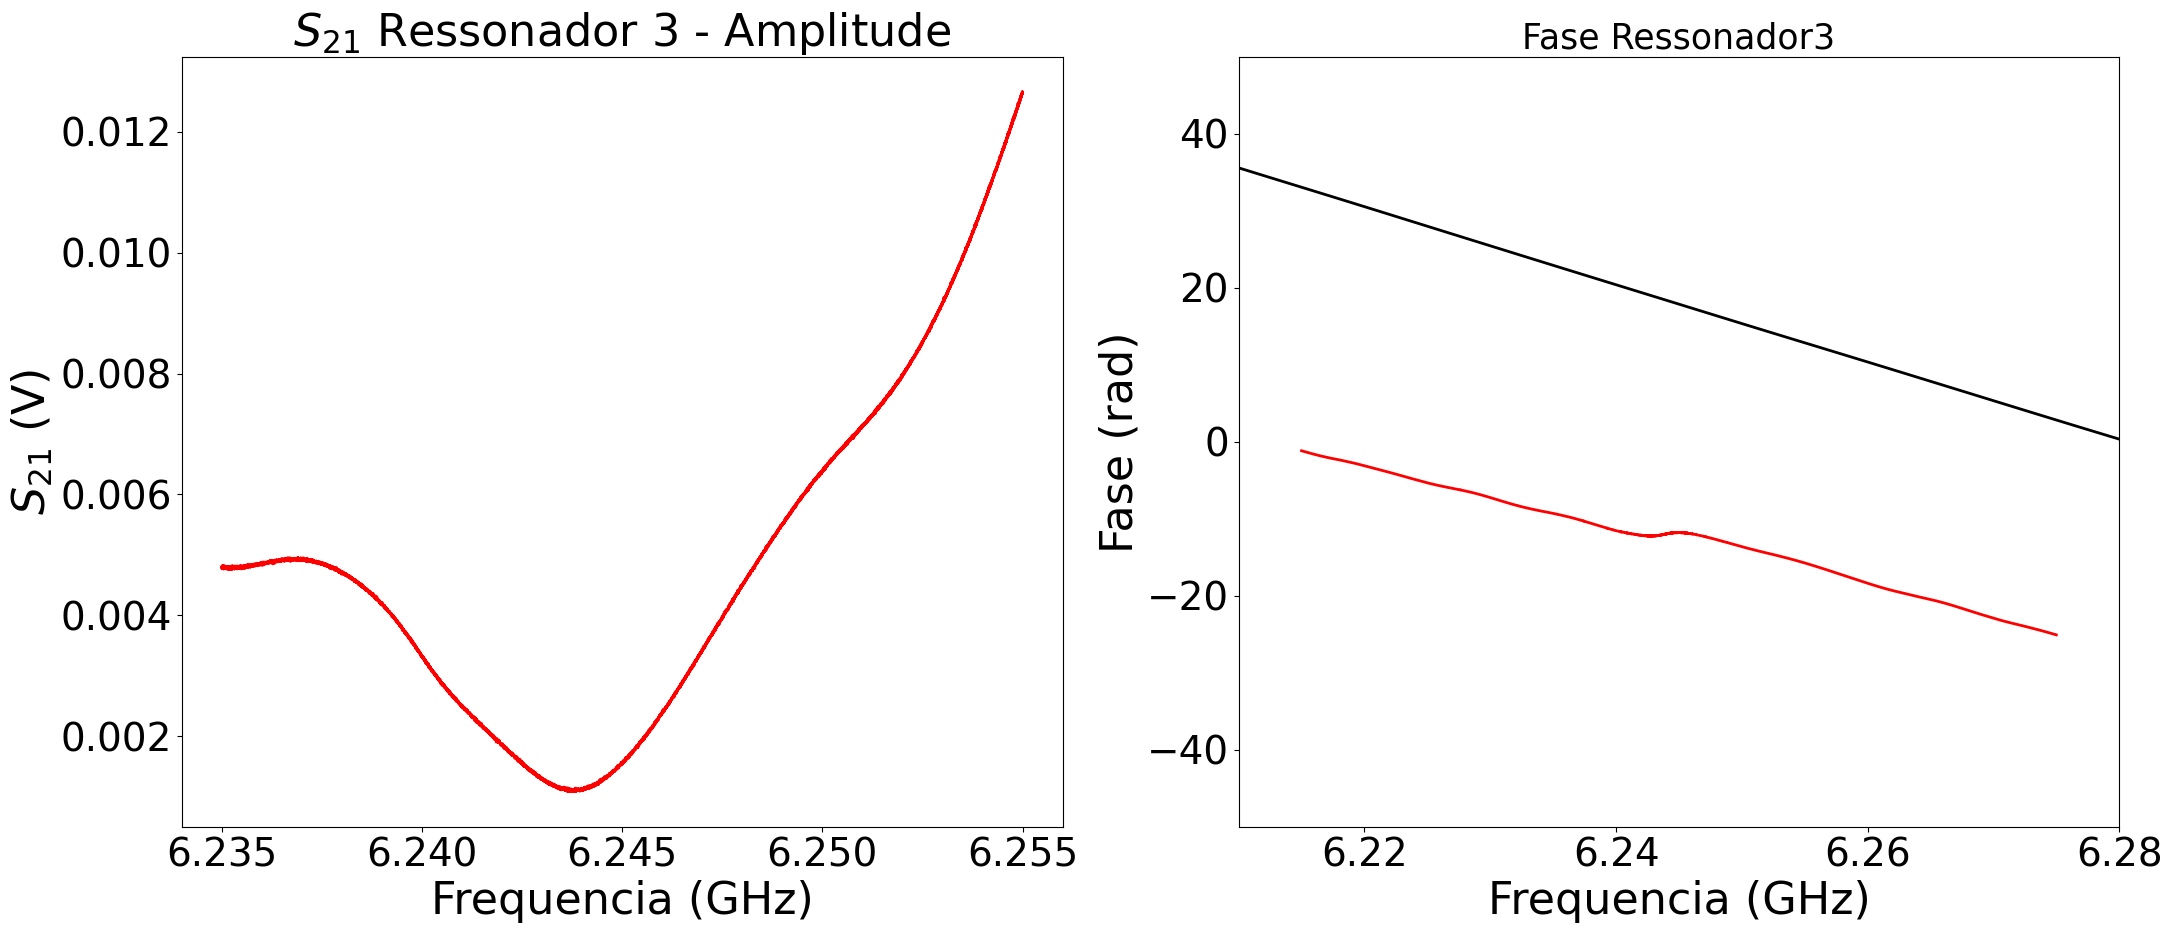

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res3, S21_res3_l, linewidth=2, color='red', label='Dados')
#ax[0].hlines(fundo_S21,S21_freq_res3[0],S21_freq_res3[-1], color='black')
ax[0].set_title("$S_{21}$ Ressonador 3 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"$S_{21}$ (V)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res3,fase_res3_l, linewidth=2, color='red', label='Dados')
ax[1].plot(fase_freq_fundo_4_10GHz/(10**9),fase_fundo_4_10GHz_l+1150, linewidth=2, color='black', label='Dados')
ax[1].set_title("Fase Ressonador3", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (rad)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
ax[1].set_xlim(6.21,6.28)
ax[1].set_ylim(-50,50)

## Interpolação dos dados

In [60]:
fase_fundo_4_10GHz_l_fit=interp1d(fase_freq_fundo_4_10GHz/(10**9),fase_fundo_4_10GHz_l, kind='cubic')

In [61]:
# CORREÇÃO DOS DADOS
fase_res3_l_fit=wrap1(fase_fundo_4_10GHz_l_fit(fase_freq_res3)-fase_res3_l)

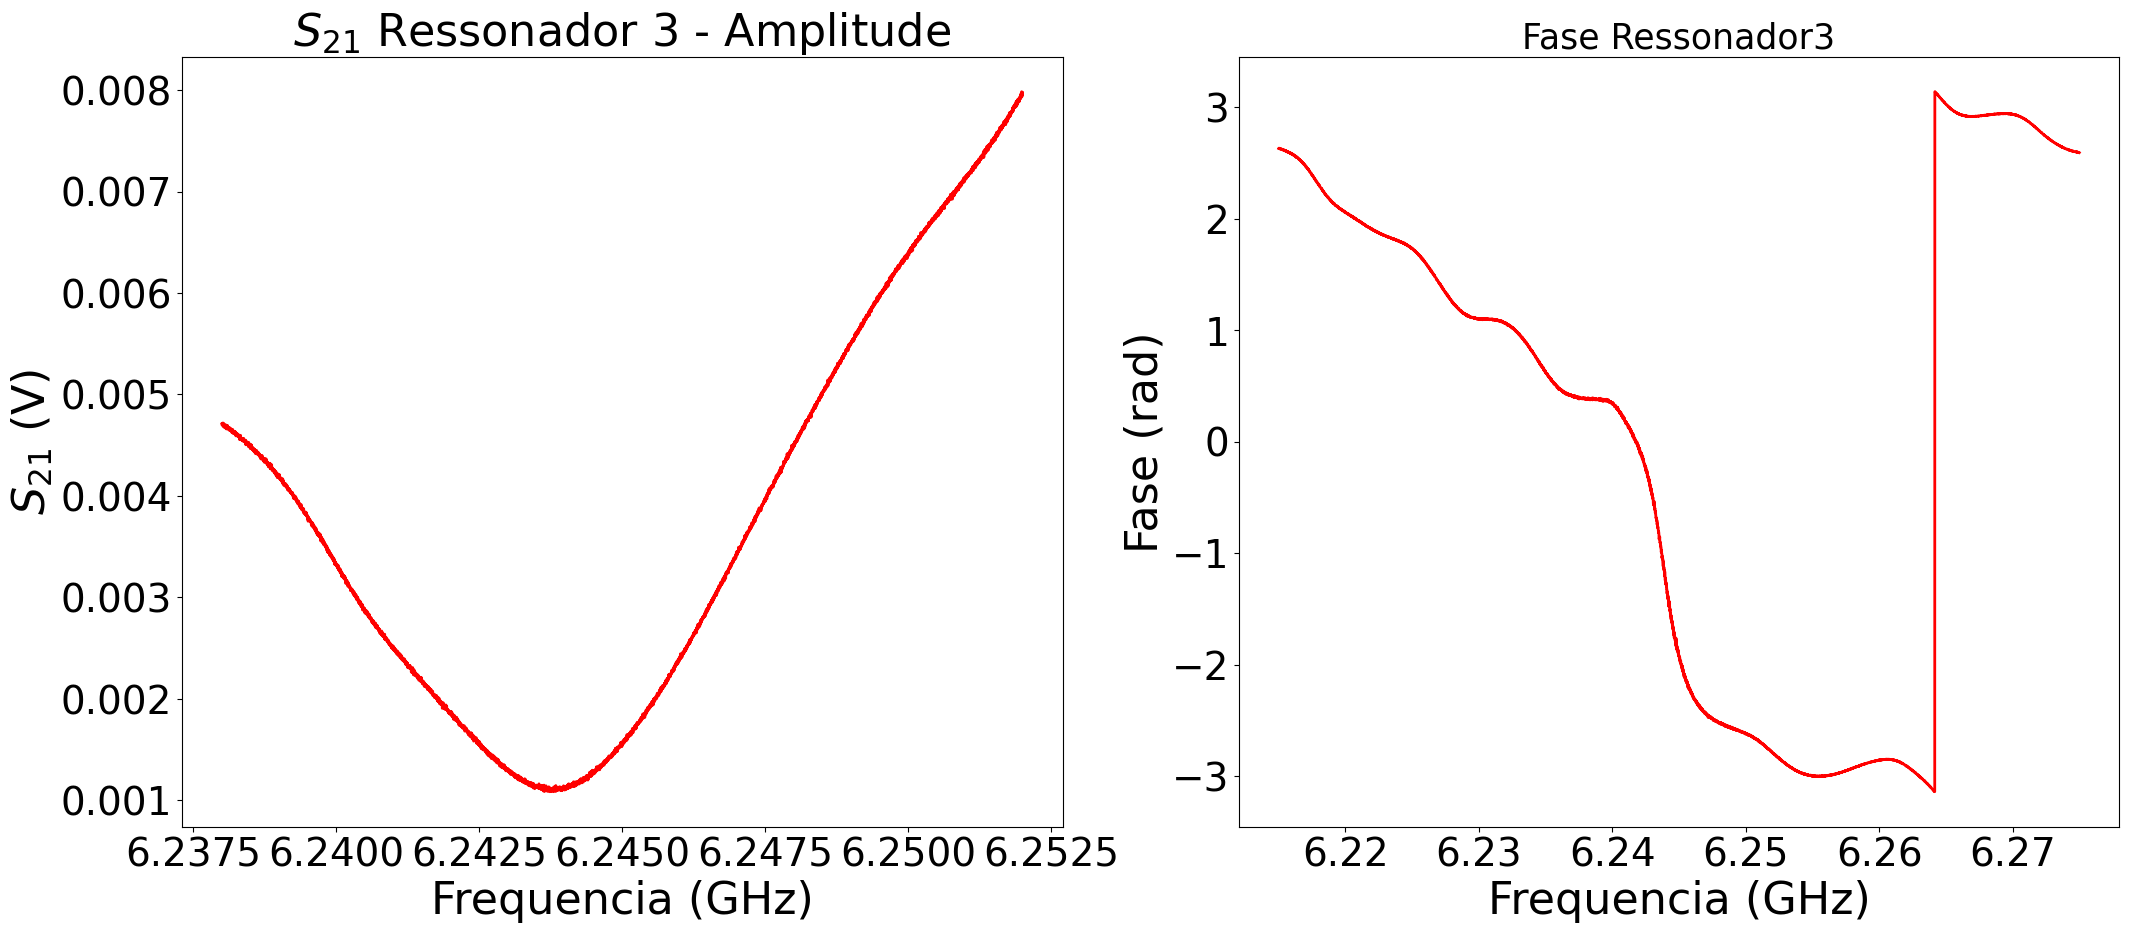

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res3[1500:8500], S21_res3_l[1500:8500], linewidth=2, color='red', label='Dados')
#ax[0].hlines(fundo_S21,S21_freq_res3[0],S21_freq_res3[-1], color='black')
ax[0].set_title("$S_{21}$ Ressonador 3 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"$S_{21}$ (V)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res3,fase_res3_l_fit, linewidth=2, color='red', label='Dados')
ax[1].set_title("Fase Ressonador3", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (rad)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
#ax[1].set_xlim(6.220,6.265)
#ax[1].set_ylim(-20,20)

In [71]:
print(len(S21_freq_res3)), print(len(fase_freq_res3))

10000
7000


(None, None)

In [107]:
# Method to calculate the center and radius of points in a circuference
from scipy      import  odr

# Import Data
X0 = S21_freq_res3[1500:8500]
Y0 = (S21_res3_l[1500:8500]*(exp(1j*fase_res3_l_fit)))* exp(-1j*np.pi/2)

x = Y0.real
y = Y0.imag

x_m = mean(x)
y_m = mean(y)

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

x_m = mean(x)
y_m = mean(y)


# method_3 = "odr"

def f_3(beta, x):
    """ implicit definition of the circle """
    return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

# initial guess for parameters
R_m = calc_R(x_m, y_m).mean()
beta0 = [ x_m, y_m, R_m]

d = sqrt((x-x_m)**2+(y-y_m)**2)
error = R_m/sqrt(mean((d-R_m)**2))
# print(error)


# for implicit function :
#       data.x contains both coordinates of the points (data.x = [x, y])
#       data.y is the dimensionality of the response
lsc_data  = odr.Data(row_stack([x, y]),y=1)#,we=1/error,wd=error)
lsc_model = odr.Model(f_3, implicit=True)
lsc_odr   = odr.ODR(lsc_data, lsc_model, beta0)
lsc_out   = lsc_odr.run()

xc_3, yc_3, R_3 = lsc_out.beta
Ri_3 = calc_R(xc_3, yc_3)
residu_3 = sum((Ri_3 - R_3)**2)
lsc_out.beta

array([0.00128215, 0.00261176, 0.00326716])

0.0012821534420308068 0.002611756540420868 0.0032671586114827672
1.1144421772474864


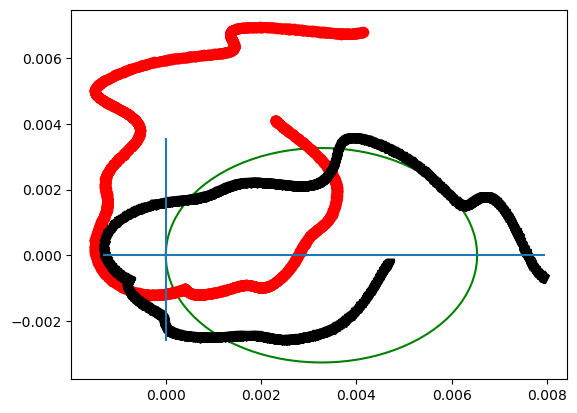

In [108]:
x0 = lsc_out.beta[0]
y0 = lsc_out.beta[1]
r0 = lsc_out.beta[2]


a = linspace(0,2*pi,100)
x = r0 + r0 *cos(a)
y =  r0 *sin(a)
print(x0,y0,r0)

plt.plot(x,y,'g-')
plt.plot(Y0.real,Y0.imag,'ro')
Angle = arctan2(y0,x0)
print(Angle)
Y1=(Y0-complex(x0,y0))*exp(-1j*Angle)+sqrt(x0**2+y0**2)
# Y1=(Y0)*exp(1j*Angle)

plt.plot(Y1.real,Y1.imag,'kv')
# plot(Fit.real,Fit.imag,'go')
plt.hlines(0,min(Y1.real),max(Y1.real))
plt.vlines(0,min(Y1.imag),max(Y1.imag))

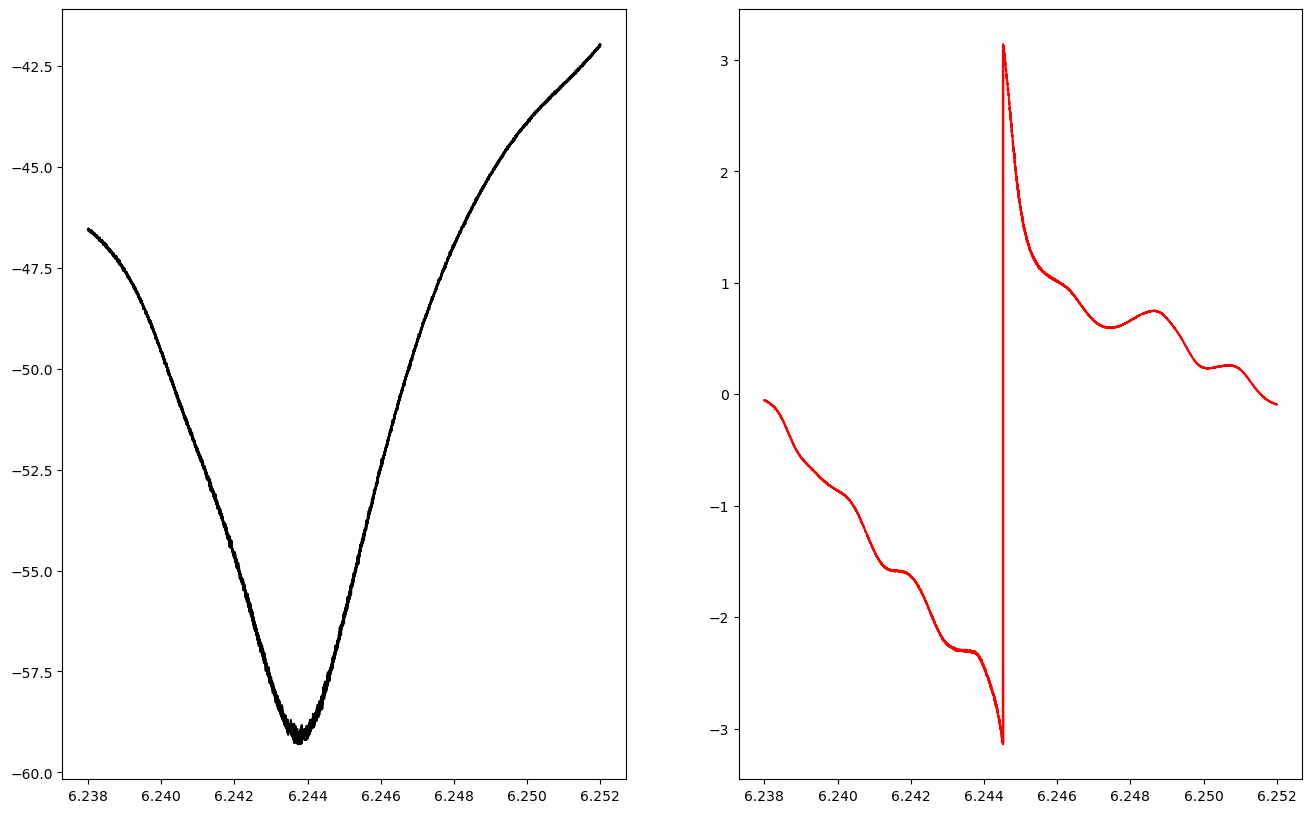

In [100]:
fig, ax = plt.subplots(1, 2, sharex=False, figsize=(16,10))
ax[0].plot(S21_freq_res3[1500:8500],20*log10(abs(Y1)),'k-')
ax[1].plot(S21_freq_res3[1500:8500],angle(Y1),'r-')




# Ressonador 4

In [27]:
S21_freq_res4,S21_res4 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/S21_chip1_8.26-8.285GHz_span.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

In [28]:
fase_freq_res4,fase_res4 = ImportS3P("C:/Users/molin/medidas mK/Medidas mK CHIP1_2024_06_08/Fase/Fase_chip1_8.25-8.3GHz_span_2.txt"\
                                       ,Delimiter = "\t", Cols = (0,1), Skip_head=0)

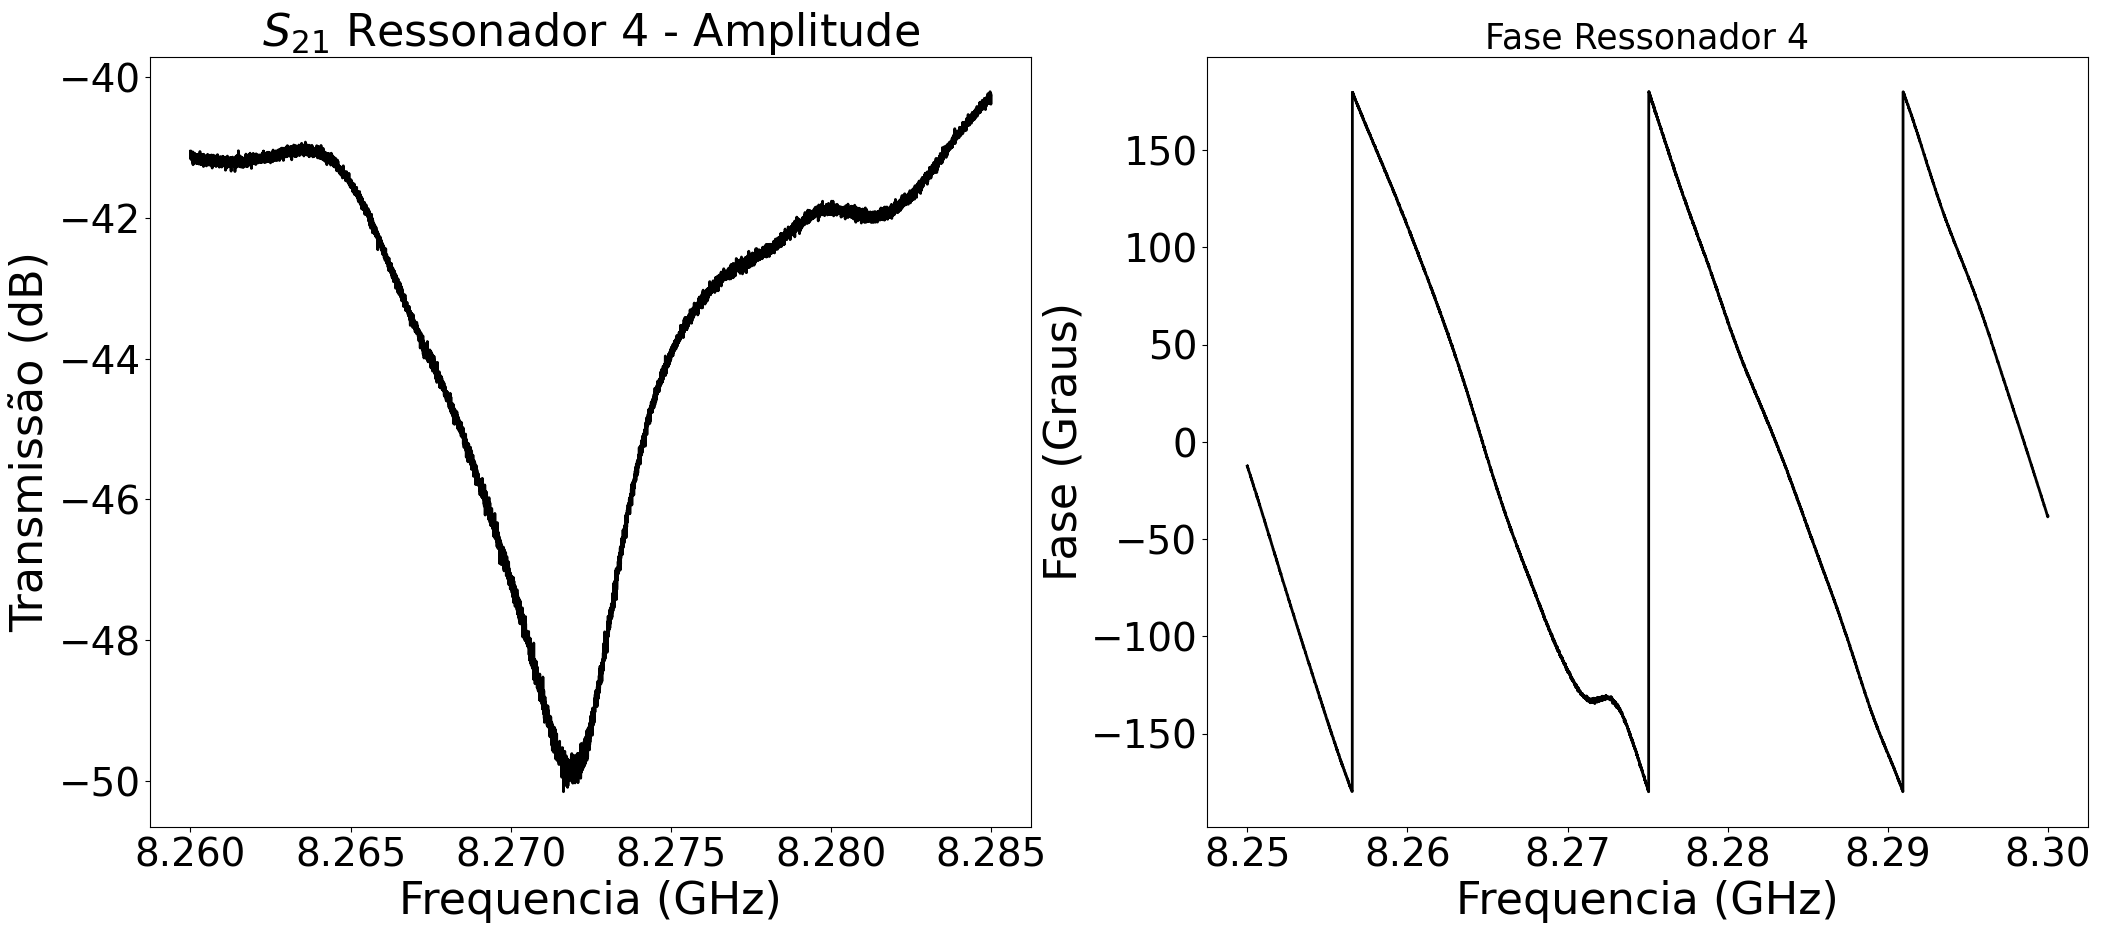

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))

ax[0].plot(S21_freq_res4, S21_res4, linewidth=2, color='black', label='Dados')
ax[0].set_title("$S_{21}$ Ressonador 4 - Amplitude", fontsize=32)
ax[0].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[0].set_ylabel(r"Transmissão (dB)", fontsize=32)
ax[0].tick_params(axis='both', which='major', labelsize=28)
#ax[0].legend(loc='lower right', prop={'size': 25})
#ax[0].set_xlim(2.08,2.12)

ax[1].plot(fase_freq_res4,fase_res4, linewidth=2, color='black', label='Dados')
ax[1].set_title("Fase Ressonador 4", fontsize=25)
ax[1].set_xlabel(r"Frequencia (GHz)", fontsize=32)
ax[1].set_ylabel(r"Fase (Graus)", fontsize=32)
ax[1].tick_params(axis='both', which='major', labelsize=28)
#ax[1].legend(loc='upper right', prop={'size': 25})
#ax[1].set_xlim(8.2,8.7)
#ax[1].set_ylim(-50,0)